# Algoritmo Analisis de Sentimientos en Tweeter
## Instalar
- `pip install tweepy`
- `pip install textblob`
- `pip install wordcloud`
- `pip install numpy`
- `pip install wordcloud`
- `pip install pandas`


In [64]:
import tweepy
from textblob import TextBlob #simplifica el procesamiento de teto
from wordcloud import WordCloud
import pandas as pd
import numpy as np #procesos matematicos
import re # expresiones regulares 
import matplotlib.pyplot as plt # graficos
plt.style.use('fivethirtyeight')

**Claves de la API**

In [65]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [66]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
authenticate.set_access_token(access_token, access_token_secret)
api = tweepy.API(authenticate, wait_on_rate_limit=True)

Aqui colocamos el hashtag especifico

In [67]:
hashtag = api.search_tweets(q='#covid19', lang='es', result_type='recent', count=100)

Aqui recibiremos los datos del hashtag especifico.

In [68]:
print('Show 5 Tweets:')
i = 1
for tweet in hashtag[:5]:
    print(str(i)+ ')'+ tweet.text + '\n')
    i += 1

Show 5 Tweets:
1)RT @jhonydejoe: @FAhorro ¿q hace la gente que NO tiene para volver a comprar? el paciente se espera a que mañana a las 7 lleguen los de sis…

2)RT @MarioGarcesJim1: Las vacunas cubanas son de las más seguras del mundo, incluida la Abdala pediátrica contra la #COVID19, aseguró hoy el…

3)RT @DrPacoMoreno1: Hoy es un buen día para la niñez mexicana.
Se abre el registro de vacunación contra #COVID19 para niños y niñas entre 5…

4)VIRUELA del MONO: OMS EVALUARA si VIRUELA del MONO representa "EMERGENCIA de SALUD PUBLICA INTERNACIONAL" Aquí la h… https://t.co/Tpid8iwuwg

5)RT @jhonydejoe: Hilo 1/3 Terrible servicio d @FAhorro se realizó pedido en la app para medicamento d un familiar con #COVID19 después de 4:…



Creamos un dataframe para ordenar los datos

In [69]:
df = pd.DataFrame(data=[tweet.text for tweet in hashtag], columns=['Tweets'])
df.head()

,Tweets
0,RT @jhonydejoe: @FAhorro ¿q hace la gente que ...
1,RT @MarioGarcesJim1: Las vacunas cubanas son d...
2,RT @DrPacoMoreno1: Hoy es un buen día para la ...
3,VIRUELA del MONO: OMS EVALUARA si VIRUELA del ...
4,RT @jhonydejoe: Hilo 1/3 Terrible servicio d @...


Haremos la limpieza de los Tweets con expresiones regulares para hacer un correcto análisis

In [70]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # elimina los usuarios
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # elimina los hashtags
    text = re.sub(r'RT', '', text) # elimina los Retweets
    text = re.sub(r'https?:\/\/\S+', '', text) # elimina los links
    text = re.sub(r'[^\w\s]', '', text) # elimina los caracteres especiales
    text = re.sub(r'\s+', ' ', text) # elimina los espacios multiples
    return text

df['Tweets'] = df['Tweets'].apply(clean_text)
df.head()

,Tweets
0,q hace la gente que NO tiene para volver a co...
1,Las vacunas cubanas son de las más seguras de...
2,Hoy es un buen día para la niñez mexicana Se ...
3,VIRUELA del MONO OMS EVALUARA si VIRUELA del M...
4,Hilo 13 Terrible servicio d se realizó pedido...


Obtenemos la subjetividad y la polaridad de los tweets

In [71]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [72]:
df['subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['polarity'] = df['Tweets'].apply(get_polarity)
df.head()

,Tweets,subjectivity,polarity
0,q hace la gente que NO tiene para volver a co...,0.00,0.0000
1,Las vacunas cubanas son de las más seguras de...,0.00,0.0000
2,Hoy es un buen día para la niñez mexicana Se ...,0.00,0.0000
3,VIRUELA del MONO OMS EVALUARA si VIRUELA del M...,0.00,0.0000
4,Hilo 13 Terrible servicio d se realizó pedido...,0.75,-0.3125


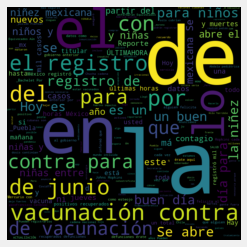

In [73]:
all_words = ' '.join([twts for twts in df['Tweets']])
word_cloud = WordCloud(width=800, height=800, random_state=21, max_font_size=300).generate(all_words)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['analysis'] = df['polarity'].apply(analysis)
df

,Tweets,subjectivity,polarity,analysis
0,q hace la gente que NO tiene para volver a co...,0.00,0.0000,Neutral
1,Las vacunas cubanas son de las más seguras de...,0.00,0.0000,Neutral
2,Hoy es un buen día para la niñez mexicana Se ...,0.00,0.0000,Neutral
3,VIRUELA del MONO OMS EVALUARA si VIRUELA del M...,0.00,0.0000,Neutral
4,Hilo 13 Terrible servicio d se realizó pedido...,0.75,-0.3125,Negative
...,...,...,...,...
95,Hoy es un buen día para la niñez mexicana Se ...,0.00,0.0000,Neutral
96,_pulido Piensan que por estar vacunados contr...,0.00,0.0000,Neutral
97,El subsecretario de salud Hugo LópezGatell in...,0.00,0.0000,Neutral
98,_Bachelet Por datos como esteojo El Mercurio ...,0.00,0.0000,Neutral


In [75]:
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
    if sortedDF['analysis'][i] == 'Positive':
        print(str(j)+ ')'+ sortedDF['Tweets'][i] + '\n')
        j += 1

1) _Puebla 13 de junio de 2022 Videoconferencia con el Gobernador y el titular de la 

2) _Puebla El titular de actualizó los datos en Puebla este 13 de junio 174 casos positivos d

3) _Puebla 14 de junio de 2022 Videoconferencia con el Gobernador y el titular de la 

4) _Puebla El titular de actualizó los datos en Puebla este 14 de junio 24 casos positivos má



In [76]:
j=1
sortedDF = df.sort_values(by=['polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
    if sortedDF['analysis'][i] == 'Negative':
        print(str(j)+ ')'+ sortedDF['Tweets'][i] + '\n')
        j += 1

1) Hilo 13 Terrible servicio d se realizó pedido en la app para medicamento d un familiar con después de 4

2)Hilo 13 Terrible servicio d se realizó pedido en la app para medicamento d un familiar con despu 



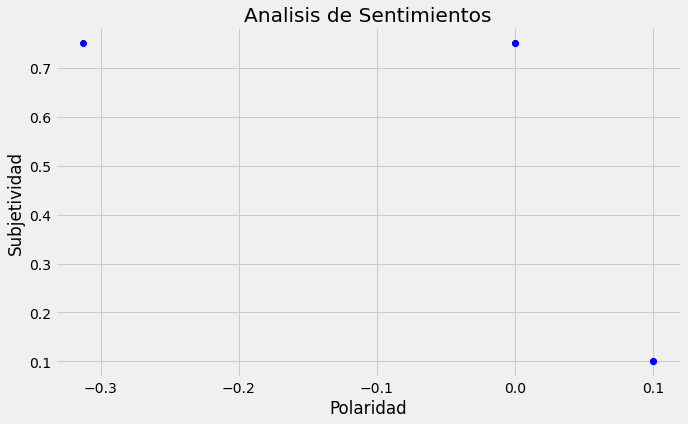

In [77]:
plt.figure(figsize=(10,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['polarity'][i], df['subjectivity'][i],color= "blue")

plt.title("Analisis de Sentimientos")
plt.xlabel('Polaridad')
plt.ylabel('Subjetividad')
plt.show()

In [78]:
ptweet = df[df.analysis == 'Positive']
pstweet = ptweet['Tweets']

round(ptweet.shape[0]/df.shape[0]*100, 2)

4.0

In [79]:
ptweet = df[df.analysis == 'Negative']
ntweet = ptweet['Tweets']

round(ptweet.shape[0]/df.shape[0]*100, 2)

2.0

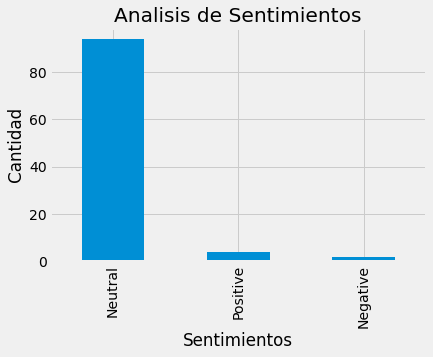

In [80]:
df['analysis'].value_counts()
plt.title('Analisis de Sentimientos')
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad')
df['analysis'].value_counts().plot(kind='bar')
plt.show()